GRIP@The Sparks Foundation - Data Science & Business Analytics Intern

# TASK-1 PREDICTION USING SUPERVISES ML

NAME-AAKASH KARUNAKARA SHETTY

To predict the percentage of marks of students based on number of hours they studied

Importing the required Libraries

In [5]:
# Importing all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Importing the dataset

In [6]:
#reading the data from csv file
data=pd.read_csv("http://bit.ly/w-data")
print("Data Imported Successfully")
print(data)


Data Imported Successfully
    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


Understanding charateristics of dataset

In [7]:
#getting dimension
data.ndim

2

In [8]:
#getting no of rows and coloumn
data.shape

(25, 2)

In [9]:
#statistical report
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours,25.0,5.012,2.525094,1.1,2.7,4.8,7.4,9.2
Scores,25.0,51.480,25.286887,17.0,30.0,47.0,75.0,95.0


In [10]:
#get data of first five rows
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [11]:
#get data of last five rows
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [12]:
#to get the column in the given data
data.columns

Index(['Hours', 'Scores'], dtype='object')

In [13]:
# to check if data contain null or missing value
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

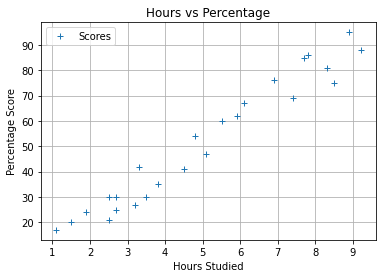

In [14]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='+')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.grid()
plt.show()


From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.


 DATA PREPARATION

In [15]:
#dividing the data into "attributes" (inputs) and "labels" (outputs).
X = data.iloc[:, :-1].values
y = data.iloc[:, 1].values 


In [17]:
X


array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [19]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

In [21]:
# to split this data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
 test_size=0.2, random_state=0)

# Training the Algorithm


In [22]:
from sklearn.linear_model import LinearRegression as lr
regressor = lr()
regressor.fit(X_train, y_train)
print("Training complete.")

Training complete.


In [23]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_


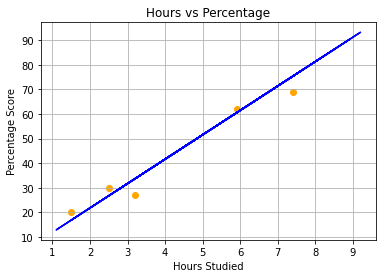

In [24]:
# Plotting for the test data
plt.title('Hours vs Percentage')
plt.scatter(X_test, y_test, color='orange')
plt.plot(X, line, color='blue');
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.grid()
plt.show()

In [25]:
#making scores predictions
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [26]:
# Comparing Actual vs Predicted
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
data


,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [27]:
y_test

array([20, 27, 69, 30, 62], dtype=int64)

In [28]:
X_test

array([[1.5],
       [3.2],
       [7.4],
       [2.5],
       [5.9]])

In [30]:
X=np.array(X)
X=X.reshape(-1,1)


In [31]:
y.reshape(-1, 1)

array([[21],
       [47],
       [27],
       [75],
       [30],
       [20],
       [88],
       [60],
       [81],
       [25],
       [85],
       [62],
       [41],
       [42],
       [17],
       [95],
       [30],
       [24],
       [67],
       [69],
       [30],
       [54],
       [35],
       [76],
       [86]], dtype=int64)

Evaluating the Model

In [32]:
from sklearn import metrics
print('Mean Absolute Error:',
 metrics.mean_absolute_error(y_test, y_pred))
print("mean_squared_error: ", metrics.mean_squared_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002982
mean_squared_error:  21.598769307217456


Making Predictions

In [33]:
#making the prediction
hours = 9.25
hours = np.array(hours).reshape(1, -1)
pred_percentage = regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("The predicted percentage of the student is", pred_percentage[0])

No of Hours = [[9.25]]
The predicted percentage of the student is 93.69173248737539
